<a href="https://colab.research.google.com/github/igmim-yassine/Pytorch-learning/blob/master/01E_word_embeddings_Emines_NLPClass_Jan2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook Summary
In this notebook, you will learn to:
1. Perform text cleaning and text processing (Manually and with NLTK)
2. Plot some statistics on a given text with nltk and wordcloud package
3. Load and use Word2Vec Model to see analogies on words
4. Use an `Embedding` layer of tensorflow.keras to train (or load) an embedding layer for sentiment analysis. 

In [29]:
!pip install nltk
!pip install gensim
!pip install wordcloud
!pip install tenserflow

ERROR: Could not find a version that satisfies the requirement tenserflow (from versions: none)
ERROR: No matching distribution found for tenserflow


In [30]:
# MAIN IMPORTS
import re
import nltk
import gensim
import string
import matplotlib.pyplot as plt
import numpy as np

## 1. Text Processing

### 1.1 Manual Text Preprocessing
We will use the metamorphosis text of Kakfa, available at this link: 
https://drive.google.com/file/d/1ip_8SZt0eYqkQMivtbTfnNiEqImtJS2t/view?usp=sharing

In [31]:
# read text file
filename = '/content/metamorphosis.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [32]:
# split text into words by whitespace
words = text.split()
print('number of words', len(words))
print(words[:50])

number of words 22086
['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The']


In [33]:
# another way to split by words
# split based on words only
words_2 = re.split(r'\W+', text)
print(words_2[:50])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections']


In [34]:
# remove ponctuation. Python includes a constant string.punctuation that provides a great list of punctuation. 
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [35]:
# use regular expression to select for the punctuation characters and use the sub function to replace them with nothing. 
# create the punctuation regular expression
re_punc = re.compile('[%s]'% re.escape(string.punctuation))
stripped_words = [re_punc.sub('', w) for w in words]
print(stripped_words[:50])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The']


In [36]:
# filter out non printable characters
print(string.printable)
re_print = re.compile('[%s]'% re.escape(string.printable))
result = [re_print.sub('', w) for w in stripped_words]
# print(result[:50])

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 	



In [37]:
# it is common to convert all words to one case to shrink the vocabulary. 
# convert to lower case
stripped_words = [w.lower() for w in stripped_words]
print(stripped_words[:50])

['one', 'morning', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'he', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'the']


### 1.2 Text Preprocessing with NLTK

In [38]:
# download data from the library
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# split into sentences
from nltk import sent_tokenize
sentences = sent_tokenize(text)
print("number of senteces", len(sentences))
for i in range(10):
  print(sentences[i])

number of senteces 797
One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.
He lay on
his armour-like back, and if he lifted his head a little he could
see his brown belly, slightly domed and divided by arches into stiff
sections.
The bedding was hardly able to cover it and seemed ready
to slide off any moment.
His many legs, pitifully thin compared
with the size of the rest of him, waved about helplessly as he
looked.
"What's happened to me?"
he thought.
It wasn't a dream.
His room,
a proper human room although a little too small, lay peacefully
between its four familiar walls.
A collection of textile samples
lay spread out on the table - Samsa was a travelling salesman - and
above it there hung a picture that he had recently cut out of an
illustrated magazine and housed in a nice, gilded frame.
It showed
a lady fitted out with a fur hat and fur boa who sat upright,
raising a heavy fur muff that covered the whole of 

In [40]:
from nltk.tokenize import word_tokenize
# split into words
tokens = word_tokenize(text)
print(len(tokens))
print(tokens[:50])

24936
['One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by']


In [41]:
# filter punctuation. 
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:50])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding']


Stop words are those words that do not contribute to the deeper meaning of the phrase. They
are the most common words such as: the, a, and is. For some applications like documentation
classification, it may make sense to remove stop words. NLTK provides a list of commonly
agreed upon stop words for a variety of languages, such as English. They can be loaded as
follows:

In [42]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("number of stop words", len(stop_words))
print(stop_words)

number of stop words 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own'

**Exercise 1**: 
Write a function `process_text` that takes an input the raw text filename and output a list of "clean" words using the function implemented above: 
* put all words in lowercase
* remove all punctuation
* remove tokens that are not alphabetic
* filter out stop words


In [43]:
def preprocess_text(filename):
  file = open(filename, 'rt')
  text = file.read()
  file.close()
  tokens = word_tokenize(text)
  tokens = [w.lower() for w in tokens]
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
  stripped = [re_punc.sub('', w) for w in tokens]
  words = [w for w in stripped if w.isalpha()]
  words = [w for w in words if w not in set(stopwords.words('english'))]
  return words

In [44]:
words = preprocess_text('/content/metamorphosis.txt')

## 2. Statistics on Text and Word Visualizaton

In [45]:
from nltk.probability import FreqDist
# histogram of most common words. 
fdist = FreqDist(words)
fdist1 = fdist.most_common(30)
fdist1

[('gregor', 289),
 ('would', 191),
 ('room', 131),
 ('could', 126),
 ('father', 102),
 ('sister', 101),
 ('door', 87),
 ('mother', 87),
 ('back', 82),
 ('even', 80),
 ('way', 62),
 ('time', 59),
 ('nt', 58),
 ('one', 57),
 ('said', 51),
 ('little', 49),
 ('get', 44),
 ('still', 44),
 ('first', 44),
 ('made', 40),
 ('go', 40),
 ('see', 39),
 ('without', 39),
 ('head', 38),
 ('much', 38),
 ('chief', 37),
 ('clerk', 37),
 ('like', 36),
 ('open', 35),
 ('samsa', 34)]

**Exercise 2:**
Plot the histogram of most common words using `plt.bar`

In [46]:
def plot_most_common_words(fdist1):
  fdist1_dict = {k:v for k,v in fdist1}
  plt.figure(figsize=(50, 10))
  plt.title("Most common words")
  plt.bar(fdist1_dict.keys(), fdist1_dict.values())
  plt.tick_params(labelsize=24)

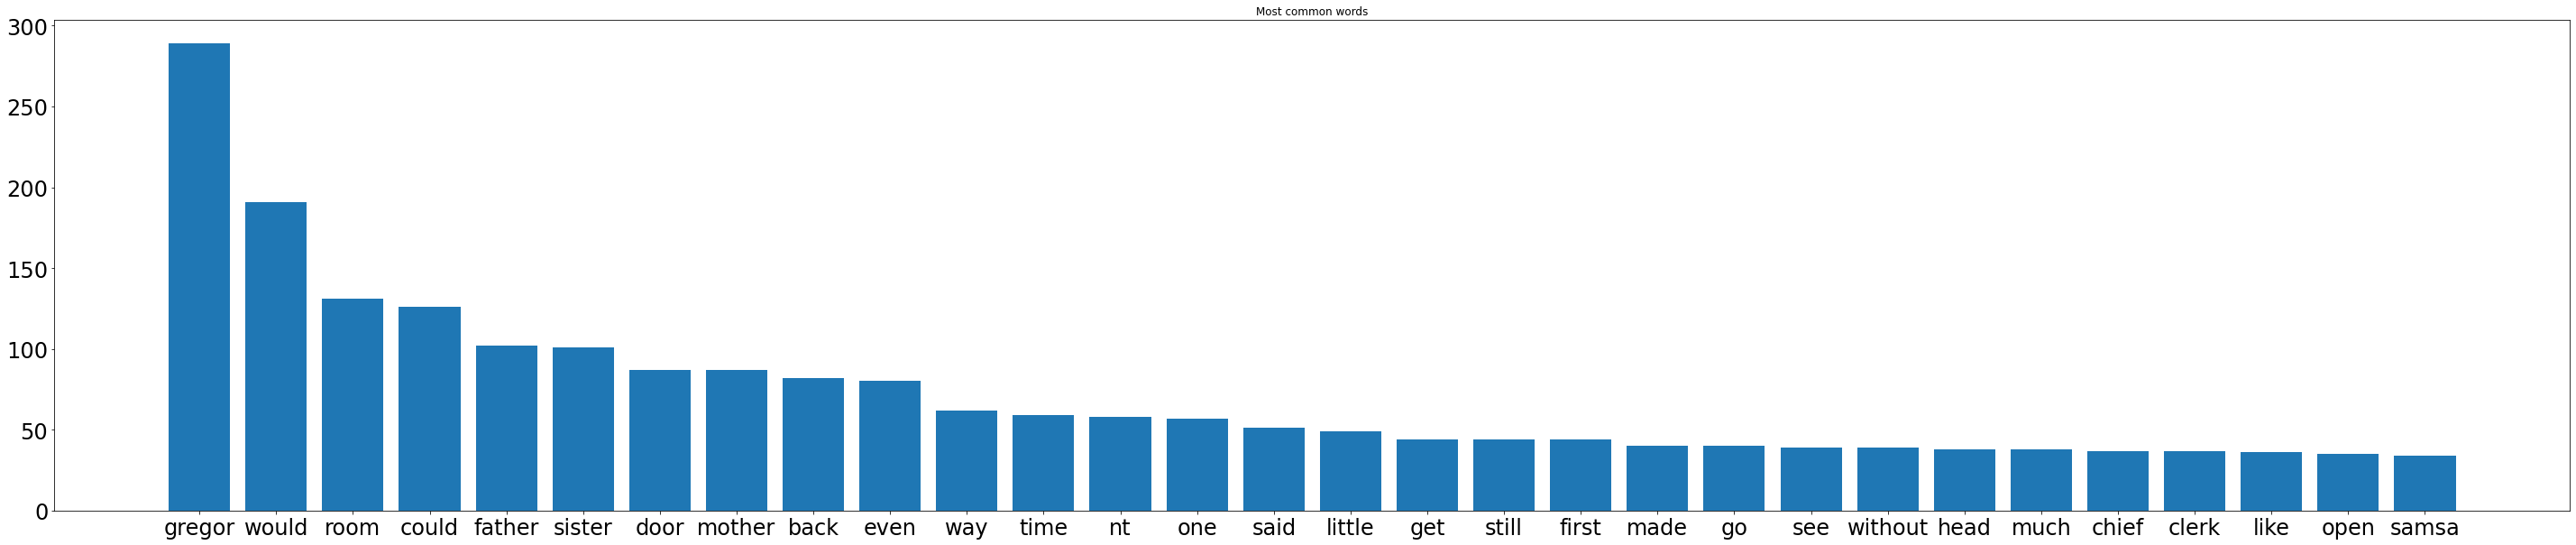

In [47]:
plot_most_common_words(fdist1)

**Exercise 3**: 
Plot a wordcloud plot on the processed "words".   
See for example the following tutorial: https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5


In [48]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

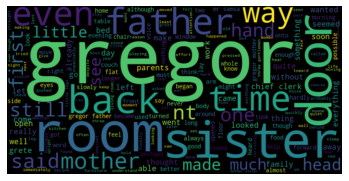

In [49]:
# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400).generate(' '.join(words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 3. Word2Vec Model
We will use the `gensim` library: https://radimrehurek.com/gensim/ 

Gensim is an open source Python library for natural language processing, with a focus on topic modeling.  
Using gensim, you can load and use pretrained embedding models like Word2Vec and GloVe. 


In [50]:
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import gensim.downloader as api
import pprint
nltk.download('reuters')
from nltk.corpus import reuters
import random
import scipy as sp
from sklearn.decomposition import PCA
np.random.seed(0)
random.seed(0)
# ----------------

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!


### 3.1 Load pretrain Word2Vec embeddings
We use `gensim.downloader` api to download pretrained word embedding models.  
https://radimrehurek.com/gensim/downloader.html

In [52]:
# load pretrained word2vec embeddings
def load_word2vec():
    """ Load Word2Vec Vectors
        Return:
            wv_from_bin: All 3 million embeddings, each lengh 300
    """
    wv_from_bin = api.load("word2vec-google-news-300") #TODO use the same kind of stuff for GLOVE. 
    vocab = list(wv_from_bin.vocab.keys())
    print("Loaded vocab size %i" % len(vocab))
    return wv_from_bin

In [53]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This may take several minutes
# -----------------------------------
model = load_word2vec()

Loaded vocab size 3000000


Cosine Similarity (most_similar function is based on cosine similarity).
Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

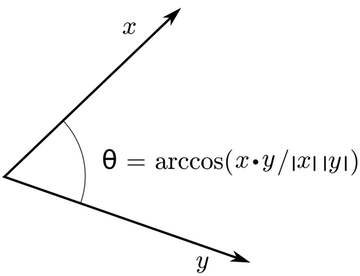

Instead of computing the actual angle, we can leave the similarity in terms of $similarity = cos(\Theta)$. Formally the [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) $s$ between two vectors $p$ and $q$ is defined as:

$$s = \frac{p \cdot q}{||p|| ||q||}, \textrm{ where } s \in [-1, 1] $$ 

### 3.2 Solving Analogies with Word2Vec Vectors
Word2Vec vectors have been shown to *sometimes* exhibit the ability to solve analogies. 

As an example, for the analogy "man : king :: woman : x", what is x?

In the cell below, we show you how to use word vectors to find x. The `most_similar` function finds words that are most similar to the words in the `positive` list and most dissimilar from the words in the `negative` list. The answer to the analogy will be the word ranked most similar (largest numerical value).

**Note:** Further Documentation on the `most_similar` function can be found within the __[GenSim documentation](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar)__.

In [54]:
# arithmetic operations on words
result = model.most_similar(positive=['woman' , 'king'], negative=['man'], topn=1) # (king-man) + woman --> ? 
print(result)

[('queen', 0.7118192911148071)]


**Exercise 4:**
Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences.

**Note**: You may have to try many analogies to find one that works!

In [55]:
# arithmetic operations on words
result = model.most_similar(positive=['ronaldo' , 'barcelona'], negative=['messi'], topn=1) # (barcelona-messi) + ronaldo --> ? 
print(result)

[('real_madrid', 0.6933578848838806)]


**Bias in Word vectors**

In [56]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(model.most_similar(positive=['woman', 'boss'], negative=['man']))
print()
pprint.pprint(model.most_similar(positive=['man', 'boss'], negative=['woman']))

[('bosses', 0.5522644519805908),
 ('manageress', 0.49151360988616943),
 ('exec', 0.459408164024353),
 ('Manageress', 0.45598435401916504),
 ('receptionist', 0.4474116861820221),
 ('Jane_Danson', 0.44480547308921814),
 ('Fiz_Jennie_McAlpine', 0.44275766611099243),
 ('Coronation_Street_actress', 0.44275569915771484),
 ('supremo', 0.4409852921962738),
 ('coworker', 0.4398624897003174)]

[('supremo', 0.6097397804260254),
 ('MOTHERWELL_boss', 0.5489562153816223),
 ('CARETAKER_boss', 0.5375303626060486),
 ('Bully_Wee_boss', 0.5333974361419678),
 ('YEOVIL_Town_boss', 0.5321705341339111),
 ('head_honcho', 0.5281980037689209),
 ('manager_Stan_Ternent', 0.525971531867981),
 ('Viv_Busby', 0.5256163477897644),
 ('striker_Gabby_Agbonlahor', 0.5250812768936157),
 ('BARNSLEY_boss', 0.5238943099975586)]


**Exercise 5:**
Find another bias example. 

In [57]:
# ------------------ FIND ANOTHER BIAS EXAMPLE--------------------------------
# Write your bias exploration code here.

# pprint.pprint(wv_from_bin.most_similar(positive=[], negative=[]))
# print()
# pprint.pprint(wv_from_bin.most_similar(positive=[], negative=[]))

# ------------------

### 3.1 Train Word2Vec model from scratch

In [58]:
from gensim.models import Word2Vec
# define training data
sentences = [['this' , 'is' , 'the' , 'first' , 'sentence' , 'for' , 'word2vec'],
             ['this' , 'is' , 'the' , 'second' , 'sentence' ],
             ['yet' , 'another' , 'sentence' ],
             ['one' , 'more' , 'sentence' ],
             ['and' , 'the' , 'final' , 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.1375607e-03 -9.0822294e-05  4.5676125e-04  4.7124610e-03
  1.0187395e-03  2.0465045e-03 -6.5812387e-04  1.6618423e-03
 -2.4118084e-03 -1.7460466e-03 -4.7523896e-03  2.9624770e-03
  2.0074630e-03 -3.6843314e-03  1.6324895e-03 -4.7902940e-03
 -1.3695343e-03 -4.5762272e-03  2.8434426e-03 -4.4643860e-03
 -1.5849179e-03 -3.8481946e-03  3.8216608e-03 -3.7203820e-03
 -5.3493778e-04  2.2258061e-04 -2.0050581e-03  1.4786134e-03
 -2.8441662e-03 -4.5946779e-04  2.1442960e-03 -5.0878292e-04
 -4.7821621e-03 -3.9207032e-03 -2.7918913e-03  3.5550473e-03
  3.0746802e-03  2.5734238e-03 -2.1022194e-04 -2.9647339e-03
 -2.7441115e-03 -4.2379261e-03  4.1282722e-03  1.5892145e-03
  1.0315040e-03 -1.7575499e-03  4.4485396e-03  4.1828095e-03
  1.9013246e-03 -1.1462719e-03 -1.6832878e-03  1.3492045e-03
  1.1734221e-03  1.5087010e-03 -2.5026884e-0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()


**Exercise 6**:  

Create a function `plot_word_vectors` that: 
* do a 2d PCA on each word vectors using https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
* Plot the 2D PCA representation of the word vectors using `plt.annotate`

In [59]:
# retrieve word vectors
word_vectors = model[model.wv.vocab]
print(word_vectors.shape)

(14, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [60]:
def plot_word_vectors(word_vectors):
  # 2d PCA on word vectors
  pca = PCA(n_components=2)
  result = pca.fit_transform(word_vectors)
  # scatter plot of the 2D words vectors
  words = list(model.wv.vocab)
  for i,w in enumerate(words):
    plt.annotate(w, xy=(result[i, 0], result[i, 1]))
  plt.xlim((-0.02, 0.02))
  plt.ylim((-0.02, 0.02))
  plt.show()  

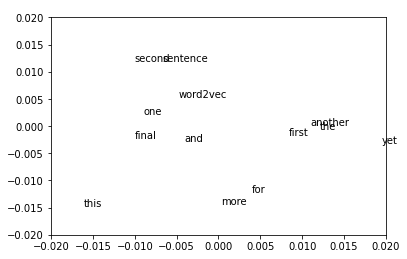

In [61]:
plot_word_vectors(word_vectors)

## 4. Using Embedding layer in tensorflow.keras



In [62]:
# imports 
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

### 4.1 Train an Embedding layer from scratch.

In [63]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.' ]
# define class labels
labels = np.array([1,1,1,1,1,0,0,0,0,0])

In [64]:
# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
max_length = len(max(encoded_docs, key=len))
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[38, 39], [10, 6], [22, 2], [1, 6], [7], [4], [26, 2], [43, 10], [26, 6], [16, 34, 39, 7]]
[[38 39  0  0]
 [10  6  0  0]
 [22  2  0  0]
 [ 1  6  0  0]
 [ 7  0  0  0]
 [ 4  0  0  0]
 [26  2  0  0]
 [43 10  0  0]
 [26  6  0  0]
 [16 34 39  7]]


In [73]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
model.compile(optimizer= 'adam' , loss= 'binary_crossentropy' , metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 4, 32)             1600      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [74]:
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
print()
loss, accuracy = model.evaluate(padded_docs, labels, verbose=1)
print('Accuracy: %f ' % (accuracy*100))
print('Loss: %f ' % (loss*100))


1/1 [==============================] - 0s 145ms/step - loss: 0.5443 - acc: 0.9000
Accuracy: 89.999998 
Loss: 54.431099 


### 4.2 Use Glove Embeddings in a tf.keras `Embedding` layer

Load pretrained GloVe Embeddings



In [75]:
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
glove_emb = api.load("glove-wiki-gigaword-50")
# print(glove_emb.word_vec("the"))
print("glove dimensions:", len(glove_emb.word_vec("the")))
result = glove_emb.most_similar(positive=['woman' , 'king'], negative=['man'], topn=1)
print(result)

glove dimensions: 50
[('queen', 0.8523603677749634)]


#### Build the vocabulary
use `Tokenizer` module of tensorflow: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

In [86]:
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
vocab = t.word_index
print("VOCAB:", vocab)
vocab["<PAD>"] = 0

VOCAB: {'work': 1, 'done': 2, 'good': 3, 'effort': 4, 'poor': 5, 'well': 6, 'great': 7, 'nice': 8, 'excellent': 9, 'weak': 10, 'not': 11, 'could': 12, 'have': 13, 'better': 14}


#### Text one-hot encoding + padding
Use `one_hot` and `pad_sequences` functions of `tensorflow.keras.preprocessing`

In [94]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs) # [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
max_length = len(max(encoded_docs, key=len))
print(max_length)
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
4
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [95]:
# get word embedding of a specific word
glove_emb.word_vec("first")

array([-0.14168  ,  0.41108  , -0.31227  ,  0.16633  ,  0.26124  ,
        0.45708  , -1.2001   ,  0.014923 , -0.22779  , -0.16937  ,
        0.34633  , -0.12419  , -0.65711  ,  0.29226  ,  0.62407  ,
       -0.57916  , -0.33947  , -0.22046  , -1.4832   ,  0.28958  ,
        0.081396 , -0.21696  ,  0.0056613, -0.054199 ,  0.098504 ,
       -1.5874   , -0.22867  , -0.62957  , -0.39542  , -0.080841 ,
        3.5949   , -0.16872  , -0.39024  ,  0.026912 ,  0.52646  ,
       -0.022844 ,  0.63289  ,  0.62702  , -0.22171  , -0.45045  ,
       -0.14998  , -0.27723  , -0.46658  , -0.44268  , -0.43691  ,
        0.38455  ,  0.1369   , -0.25424  ,  0.017821 , -0.1489   ],
      dtype=float32)

**Exercise 7:**  

Implement a word embedding matrix `word_embedding_matrix` of size (vocab_size, dim_glove=50) that stores the word vector of each word in the vocab. 
> Use the `word_vec` method of glove embeddings. 

In [103]:
def word_embedding_matrix(glove_emb, vocab_size):
  # create a weight matrix for words in training docs
  embedding_matrix = np.zeros((vocab_size, 50))
  ### ----------------------- YOUR CODE HERE --------------------------------------------- ###
  for word,i in vocab.items():
    print(word)
    # check if word belongs to Glove vocabulary 
    if word in glove_emb.vocab.keys():
      embedding_vector = glove_emb.word_vec(word)
      embedding_matrix[i] = embedding_vector
  print('Null word embedding: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))    
  return embedding_matrix

In [104]:
embedding_matrix = word_embedding_matrix(glove_emb, vocab_size)

work
done
good
effort
poor
well
great
nice
excellent
weak
not
could
have
better
<PAD>
Null word embedding: 1


In [105]:
# define model
model = Sequential()
model.add(Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=len(max(encoded_docs, key=len)), trainable=False))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(optimizer= 'adam' , loss= 'binary_crossentropy' , metrics=['acc'])
model.summary()
model.fit(padded_docs, labels, epochs=50, verbose=0)
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 4, 50)             750       
                                                                 
 flatten_3 (Flatten)         (None, 200)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 951
Trainable params: 201
Non-trainable params: 750
_________________________________________________________________
Accuracy: 80.000001
